## Electro Docs

# Teorema de Nyquist
### Tomas A. Albanesi

## Indice de contenidos:
* [1. Introducción](#1)
* [2. Inicializaciones de código](#2)
* [3. Ejemplo gráfico de teorema en Python](#3)

## 1. Introducción <a class="anchor" id="1"></a>

El teorema de muestreo de Nyquist-Shannon, también conocido como teorema de muestreo de Whittaker-Nyquist-Kotelnikov-Shannon o bien teorema de Nyquist, es un teorema fundamental de la teoría de la información, de especial interés en las telecomunicaciones.

Este teorema fue formulado en forma de conjetura por primera vez por Harry Nyquist en 1928 (Certain topics in telegraph transmission theory), y fue demostrado formalmente por Claude E. Shannon en 1949 (Communication in the presence of noise). 


## 2. Inicializaciones de código <a class="anchor" id="2"></a>

In [11]:
# Importación de librerías
from IPython.display import display, Math, Markdown
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## 3. Ejemplo gráfico de teorema en Python <a class="anchor" id="3"></a>

In [12]:
# Definimos la señal original

# Parámetros de la señal
frecuencia_senal = 5  # Frecuencia de la señal en Hz
duracion = 1          # Duración de la señal en segundos
frecuencia_muestreo_original = 100  # Frecuencia de muestreo original en Hz (mucho mayor que el doble de la frecuencia de la señal)

# Crear el tiempo y la señal original
t_original = np.linspace(0, duracion, int(frecuencia_muestreo_original * duracion), endpoint=False)
senal_original = np.sin(2 * np.pi * frecuencia_senal * t_original)

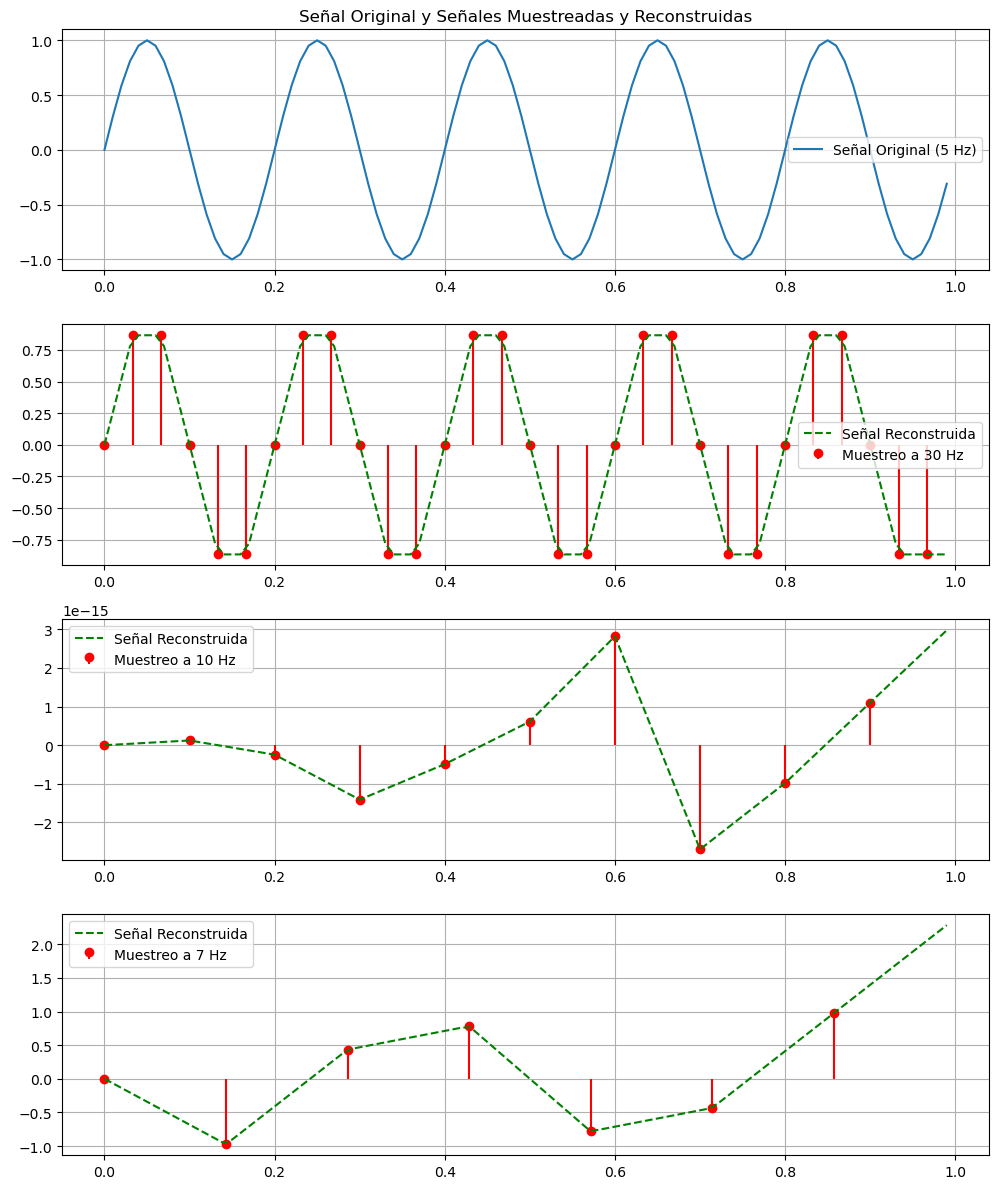

In [14]:
# Muestreo de la señal a diferentes frecuencias

# Frecuencias de muestreo para demostrar el aliasing
frecuencias_muestreo = [30, 10, 7]  # Menores que el doble de la frecuencia de la señal (2 * 5 = 10 Hz)

# Crear subplots
fig, axs = plt.subplots(len(frecuencias_muestreo) + 1, 1, figsize=(10, 12))

# Graficar la señal original
axs[0].plot(t_original, senal_original, label='Señal Original (5 Hz)')
axs[0].set_title('Señal Original y Señales Muestreadas y Reconstruidas')
axs[0].legend()
axs[0].grid(True)

# Graficar las señales muestreadas y reconstruidas
for i, fs in enumerate(frecuencias_muestreo):
    t_muestreado = np.linspace(0, duracion, int(fs * duracion), endpoint=False)
    senal_muestreada = np.sin(2 * np.pi * frecuencia_senal * t_muestreado)
    
    # Interpolación para reconstrucción de la señal
    interpolador = interp1d(t_muestreado, senal_muestreada, kind='linear', fill_value="extrapolate")
    senal_reconstruida = interpolador(t_original)
    
    # Graficar la señal muestreada
    axs[i + 1].stem(t_muestreado, senal_muestreada, 'r', markerfmt='ro', basefmt=' ', label=f'Muestreo a {fs} Hz')
    
    # Graficar la señal reconstruida
    axs[i + 1].plot(t_original, senal_reconstruida, 'g--', label='Señal Reconstruida')
    
    axs[i + 1].legend()
    axs[i + 1].grid(True)

plt.tight_layout()
plt.show()